# Examining Salaries, Crime, & Bias in Montgomery County
### by Lucy Murray
### DATA 205

## Table of Contents

* <b>[1. Introduction](#chapter1)</b>
    * [The Datasets](#section_1_1)
    * [Exploratory Questions](#section_1_2)
        * [Phase I](#section_1_2_1)
        * [Phase II](#section_1_2_2)
    * [Packages Used](#section_1_3)
* <b>[2. Montgomery County Salaries (2014-2018)](#chapter2)</b>
    * [Reading the Data](#section_2_1)
    * [Creating "mcsalaries"](#section_2_2)
    * [Creating "mcpolice"](#section_2_3)
    * [Answering Phase I Questions](#section_2_4)
        * [How did annual salary of MC employees change by gender from 2014 to 2018?](#section_2_4_1)
        * [How did annual salary of MC police change by gender from 2014 to 2018?](#section_2_4_2)
* <b>[3. Crime](#chapter3)</b>
    * [Reading the Data](#section_3_1)
    * [Creating "crime_look"](#section_3_2)
    * [Answering Phase I Questions](#section_3_3)
        * [Did the distribution of crime in different districts change from 2017 to 2019?](#section_3_3_1)
        * [What days of the week had the highest amount of crime?](#section_3_3_2)
* <b>[4. MCPD Bias Incidents](#chapter4)</b>
    * [Reading the Data](#section_4_1)
    * [Answering Phase I Questions](#section_4_2)
        * [What police districts had the highest incidents of biased crime?](#section_4_2_1)
        * [Which biased type crime occurred most often?](#section_4_2_2)        
* <b>[5. Answering Phase II Questions](#chapter5)</b>
    * [How can we compare the crime and bias datasets?](#section_5_1)
        * [Plotting proportion as a Solution](#section_5_1_1)
    * [Can we accurately predict police employees that are male with a ML model?](#section_5_2)
        * [Building a Logistic Regression model](#section_5_2_1)
        * [Interpretation of Performance Measures](#section_5_2_2)
* <b>[6. Final Thoughts](#chapter6)</b>
    * [Recommendations for further operationalization](#section_6_1)
    * [Acknowledgements](#section_6_3)

# 1. Introduction <a class="anchor" id="chapter1"></a>

This project aims to examine three datasets from [dataMontgomery](https://data.montgomerycountymd.gov/), which is the open data portal for Montgomery County, Maryland. I am interested in examining the Salaries, Crime, and MCPD Bias Incidents datasets. My  goal was to compare the salaries dataset--focusing specifically on the police department--with the crime dataset and to further explore the relatively new MCPD Bias Incidents dataset. 

## The Datasets <a class="anchor" id="section_1_1"></a>

<b>Data Montgomery: [Employee Salaries - 2016](https://data.montgomerycountymd.gov/Human-Resources/Employee-Salaries-2016/xj3h-s2i7), [Employee Salaries - 2017](https://data.montgomerycountymd.gov/Human-Resources/Employee-Salaries-2017/2qd6-mr43), and [Employee Salaries - 2018](https://data.montgomerycountymd.gov/Human-Resources/Employee-Salaries-2018/kdqy-4wzv)</b>
> These datasets provide pertinent information about Montgomery County employees' salaries such as current annual salary, gross pay received, overtime pay, department, division, assignment category (part or fulltime), date first hired, and so on. I have selected these particular years, as they coincide with other datasets I intend to use for this project.

<b>Data Montgomery: [Crime](https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3)</b>
> This dataset is updated daily and provides raw data of reported County crime. The data is derived from approved police incident reports and contains data spanning from 2016 to present day. It provides information codified by the National Incident-Based Reporting System (NIBRS) of the Criminal Justice Information Services (CJIS) Division Uniform Crime Reporting (UCR) Program. Salient variables include dispatch date/time, NIBRS Code, victims, crime name, police district name, latitude, adn longitude. I am specifically interested in creating mapping visualizations utilizing this dataset.

<b>Data Montgomery: [MCPD Bias Incidents](https://data.montgomerycountymd.gov/Public-Safety/MCPD-Bias-Incidents/7bhj-887p)</b>
> This dataset is updated monthly, and it captures incidents and criminal offenses that may be motivated by an offender's bias. Examples include bias against race, national or ethnic origin, religion, sex, mental or physical disability, sexual orientation or gender identity. It contains data from incidents spanning 2016 through present day. Although it is limited by many NA values, I am interested in variables such as bias code, bias, victim type, # of suspects, and the variables describing suspects' age ranges.

## Exploratory Questions <a class="anchor" id="section_1_2"></a>

I developed these questions into two phases: the first is to explore the individual datasets, while the second attempts to make a deeper exploration through data visaulizations and statistical analysis. My methodology for this project was to begin with several questions, explore the data, and then propose refined questions that had solutions through data visualizations or some statistical analysis.

## Phase I  <a class="anchor" id="section_1_2_1"></a>

<b>Dataset: </b>Montgomery County Salaries (2014-2018)
* How did annual salary of MC employees change by gender from 2014 to 2018?
* How did annual salary of MC police change by gender from 2014 to 2018?

<b>Dataset: </b> Crime
* Did the distribution of crime in different districts change from 2017 to 2019?
* What days of the week had the highest amount of crime?

<b>Dataset: </b> MCPD Bias Incidents
* What police districts had the highest incidents of biased crime?
* Which biased type crime occurred most often?

## Phase II <a class="anchor" id="section_1_2_2"></a>

<b>Dataset: </b> Crime & MCPD Bias Incidents
* How can we compare the crime and bias datasets?

<b>Dataset: </b> Montgomery County Salaries (2014-2018)
* Can we accurately predict police employees that are male with a ML model?

# Packages Used <a class="anchor" id="section_1_3"></a>

In [1]:
## import packages:
%matplotlib inline
import random # library of function for generating random numbers and samples
import numpy as np # for vector operations
from numpy import percentile
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
from scipy import stats #  library of statistical functions
import scipy.interpolate as interp #  library for interpolating arrays
import pandas_profiling
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Set seed for generating psuedo random numbers
np.random.seed(123)

# Set up graphics
plt.style.use('classic')
%matplotlib inline

In [2]:
#!pip install imblearn

In [3]:
#pip install sklearn

# 2. Montgomery County Salaries (2014-2018) <a class="anchor" id="chapter2"></a>

## Reading the Data <a class="anchor" id="section_2_1"></a>

### Reading the 2014 Data

In [4]:
url = 'https://raw.githubusercontent.com/lmurra38/DATA205/master/DM_Salaries/Employee_Salaries_-_2014.csv'
emp14 = pd.read_csv(url, error_bad_lines=False)

In [5]:
emp14['Year']='2014'

# renaming columns
emp14_new = emp14.rename(columns={"2014 Gross Pay Received": "Gross Pay Received", "2014 Overtime Pay": "Overtime Pay", "Underfilled Job Title": "Position Under-Filled"})

In [6]:
# checking the packaging
emp14_new.head()

,Full Name,Gender,Current Annual Salary,Gross Pay Received,Overtime Pay,Department,Department Name,Division,Assignment Category,Position Title,Position Under-Filled,Date First Hired,Year
0,"Aarhus, Pam J",F,67527.83,69165.79,1202.75,POL,Department of Police,MSB Information Management and Technology Divi...,Fulltime-Regular,Office Services Coordinator,NaN,09/22/1986,2014
1,"Aaron, David J",M,95007.83,101745.05,6519.66,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,NaN,09/12/1988,2014
2,"Aaron, Marsha M",F,102153.00,100860.09,285.40,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,NaN,11/19/1989,2014
3,"Ababio, Godfred A",M,43657.20,31611.67,4395.16,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,Resident Supervisor I,05/05/2014,2014
4,"Ababu, Essayas",M,91109.00,90837.34,NaN,HCA,Department of Housing and Community Affairs,Single Family Housing Program,Fulltime-Regular,Planning Specialist III,NaN,03/05/2007,2014


### Reading the 2015 Data

In [7]:
url = 'https://raw.githubusercontent.com/lmurra38/DATA205/master/DM_Salaries/Employee_Salaries_-_2015.csv'
emp15 = pd.read_csv(url, error_bad_lines=False)

In [8]:
emp15['Year']='2015'

# renaming columns
emp15_new = emp15.rename(columns={"2015 Gross Pay Received": "Gross Pay Received", "2015 Overtime Pay": "Overtime Pay", "Underfilled Job Title": "Position Under-Filled"})

In [9]:
# checking the packaging
emp15_new.head()

,Full Name,Gender,Current Annual Salary,Gross Pay Received,Overtime Pay,Department,Department Name,Division,Assignment Category,Position Title,Position Under-Filled,Date First Hired,Year
0,"Aarhus, Pam J.",F,68878.16,72336.79,NaN,POL,Department of Police,MSB Information Management and Technology Divi...,Fulltime-Regular,Office Services Coordinator,NaN,09/22/1986,2015
1,"Aaron, David J.",M,96908.09,101857.00,4640.99,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,NaN,09/12/1988,2015
2,"Aaron, Marsha M.",F,104196.06,103019.73,NaN,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,NaN,11/19/1989,2015
3,"Ababio, Godfred A.",M,50697.79,54181.46,4445.15,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,NaN,05/05/2014,2015
4,"Ababu, Essayas",M,92931.00,93468.35,NaN,HCA,Department of Housing and Community Affairs,Single Family Housing Program,Fulltime-Regular,Planning Specialist III,NaN,03/05/2007,2015


### Reading the 2016 Data

In [10]:
url = 'https://raw.githubusercontent.com/lmurra38/DATA205/master/DM_Salaries/Employee_Salaries_-_2016.csv'
emp16 = pd.read_csv(url, error_bad_lines=False)

In [11]:
emp16['Year']='2016'

In [12]:
# renaming columns
emp16_new = emp16.rename(columns={"2016 Gross Pay Received": "Gross Pay Received", "2016 Overtime Pay": "Overtime Pay", "Underfilled Job Title": "Position Under-Filled"})

In [13]:
# checking the packaging
emp16_new.head()

,Full Name,Gender,Current Annual Salary,Gross Pay Received,Overtime Pay,Department,Department Name,Division,Assignment Category,Employee Position Title,Position Under-Filled,Date First Hired,Year
0,"Aarhus, Pam J.",F,69222.18,71225.98,416.10,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,NaN,09/22/1986,2016
1,"Aaron, David J.",M,97392.47,103088.48,3326.19,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,NaN,09/12/1988,2016
2,"Aaron, Marsha M.",F,104717.28,107000.24,1353.32,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,NaN,11/19/1989,2016
3,"Ababio, Godfred A.",M,52734.57,57819.04,3423.07,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,NaN,05/05/2014,2016
4,"Ababu, Essayas",M,93396.00,95815.17,NaN,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,NaN,03/05/2007,2016


### Reading the 2017 Data

In [14]:
url = 'https://raw.githubusercontent.com/lmurra38/DATA205/master/DM_Salaries/Employee_Salaries_-_2017.csv'
emp17 = pd.read_csv(url, error_bad_lines=False)

In [15]:
emp17['Year']='2017'

In [16]:
# renaming columns
emp17_new = emp17.rename(columns={"2017 Gross Pay Received": "Gross Pay Received", "2017 Overtime Pay": "Overtime Pay"})

In [17]:
# checking the packaging
emp17_new.head()

,Full Name,Gender,Current Annual Salary,Gross Pay Received,Overtime Pay,Department,Department Name,Division,Assignment Category,Employee Position Title,Position Under-Filled,Date First Hired,Year
0,"Aarhus, Pam J.",F,70959.79,71316.72,0.00,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,NaN,09/22/1986,2017
1,"Aaron, Marsha M.",F,110359.00,108040.82,0.00,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Supervisory Social Worker,NaN,11/19/1989,2017
2,"Ababio, Godfred A.",M,55950.24,62575.19,7649.19,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,NaN,05/05/2014,2017
3,"Ababu, Essayas",M,95740.00,96055.94,0.00,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,NaN,03/05/2007,2017
4,"Abbamonte, Drew B.",M,74732.00,98736.78,23468.73,POL,Department of Police,PSB 6th District Special Assignment Team,Fulltime-Regular,Police Officer III,NaN,07/16/2007,2017


### Reading the 2018 Data

In [18]:
url = 'https://raw.githubusercontent.com/lmurra38/DATA205/master/DM_Salaries/Employee_Salaries_-_2018.csv'
emp18 = pd.read_csv(url, error_bad_lines=False)

In [19]:
emp18['Year']='2018'

In [20]:
# renaming columns
emp18_new = emp18.rename(columns={"2018 Gross Pay Received": "Gross Pay Received", "2018 Overtime Pay": "Overtime Pay"})

In [21]:
# checking the packaging
emp18_new.head()

,Full Name,Gender,Current Annual Salary,Gross Pay Received,Overtime Pay,Department,Department Name,Division,Assignment Category,Employee Position Title,Position Under-Filled,Date First Hired,Year
0,"Lee, Tzu C.",F,107346.00,94528.87,0.0,POL,Department of Police,MSB Management and Budget Division,Fulltime-Regular,Management and Budget Specialist III,NaN,12/08/2008,2018
1,"LeGuellec, Gael",M,128132.42,125131.66,0.0,HCA,Department of Housing and Community Affairs,Management Services,Fulltime-Regular,Senior Information Technology Specialist,NaN,02/16/1999,2018
2,"Lopez-Cuevas, Claudia V.",F,85430.13,81813.52,0.0,CUS,Community Use of Public Facilities,Finance and Administrative Support Team,Fulltime-Regular,Administrative Specialist III,Administrative Specialist I,08/23/2004,2018
3,"Maxwell, Ceciley M.",F,65163.92,61867.76,0.0,CUS,Community Use of Public Facilities,Finance and Administrative Support Team,Fulltime-Regular,Program Specialist I,NaN,05/26/2006,2018
4,"McAlpine-Eig, Catherine",F,133283.71,66129.63,0.0,HHS,Department of Health and Human Services,Adult Behavioral Health Services,Fulltime-Regular,Manager III,NaN,12/22/1985,2018


## Creating "mcsalaries" <a class="anchor" id="section_2_2"></a>

In [22]:
# Stack the DataFrames on top of each other
mcsalaries = pd.concat([emp14_new, emp15_new, emp16_new, emp17_new, emp18_new], axis=0)

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [23]:
mcsalaries.head()

,Assignment Category,Current Annual Salary,Date First Hired,Department,Department Name,Division,Employee Position Title,Full Name,Gender,Gross Pay Received,Overtime Pay,Position Title,Position Under-Filled,Year
0,Fulltime-Regular,67527.83,09/22/1986,POL,Department of Police,MSB Information Management and Technology Divi...,NaN,"Aarhus, Pam J",F,69165.79,1202.75,Office Services Coordinator,NaN,2014
1,Fulltime-Regular,95007.83,09/12/1988,POL,Department of Police,ISB Major Crimes Division Fugitive Section,NaN,"Aaron, David J",M,101745.05,6519.66,Master Police Officer,NaN,2014
2,Fulltime-Regular,102153.00,11/19/1989,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,NaN,"Aaron, Marsha M",F,100860.09,285.40,Social Worker IV,NaN,2014
3,Fulltime-Regular,43657.20,05/05/2014,COR,Correction and Rehabilitation,PRRS Facility and Security,NaN,"Ababio, Godfred A",M,31611.67,4395.16,Resident Supervisor II,Resident Supervisor I,2014
4,Fulltime-Regular,91109.00,03/05/2007,HCA,Department of Housing and Community Affairs,Single Family Housing Program,NaN,"Ababu, Essayas",M,90837.34,NaN,Planning Specialist III,NaN,2014


In [24]:
mcsalaries['Department Name'].unique()

array(['Department of Police', 'Department of Health and Human Services',
       'Correction and Rehabilitation',
       'Department of Housing and Community Affairs',
       'Department of Transportation', 'Department of General Services',
       'Community Engagement Cluster',
       'Department of Technology Services',
       'Department of Public Libraries', 'Department of Finance',
       "Sheriff's Office", 'County Council',
       'Department of Liquor Control', 'Board of Appeals Department',
       'Fire and Rescue Services', 'Department of Permitting Services',
       'Office of Human Resources', 'Offices of the County Executive',
       'Office of Human Rights', 'Department of Recreation',
       'Department of Environmental Protection',
       'Department of Economic Development',
       'Office of Management and Budget', "County Attorney's Office",
       'Community Use of Public Facilities',
       'Office of Public Information', 'Office of Consumer Protection',
       'Of

## Creating "mcpolice" <a class="anchor" id="section_2_3"></a>

In [25]:
mcpolice = mcsalaries[mcsalaries['Department Name']=='Department of Police']

In [26]:
mcpolice.head()

,Assignment Category,Current Annual Salary,Date First Hired,Department,Department Name,Division,Employee Position Title,Full Name,Gender,Gross Pay Received,Overtime Pay,Position Title,Position Under-Filled,Year
0,Fulltime-Regular,67527.83,09/22/1986,POL,Department of Police,MSB Information Management and Technology Divi...,NaN,"Aarhus, Pam J",F,69165.79,1202.75,Office Services Coordinator,NaN,2014
1,Fulltime-Regular,95007.83,09/12/1988,POL,Department of Police,ISB Major Crimes Division Fugitive Section,NaN,"Aaron, David J",M,101745.05,6519.66,Master Police Officer,NaN,2014
5,Fulltime-Regular,63056.51,07/16/2007,POL,Department of Police,PSB 6th District Special Assignment Team,NaN,"Abbamonte, Drew B",M,82599.35,18045.28,Police Officer III,NaN,2014
8,Fulltime-Regular,43410.92,02/05/2007,POL,Department of Police,FSB Traffic Division Automated Traffic Enforce...,NaN,"Abdul-Ghani, Hasinah J.",F,44010.18,20.97,Police Aide,NaN,2014
18,Parttime-Regular,19821.46,03/08/2004,POL,Department of Police,FSB Traffic Division School Safety Section,NaN,"Abkarian, Maral",F,9433.00,42.89,Crossing Guard,NaN,2014


# Answering Phase I Questions <a class="anchor" id="section_2_4"></a>

## How did annual salary of MC employees change by gender from 2014 to 2018?  <a class="anchor" id="section_2_4_1"></a>

I approached this question by utilizing boxplots, violin plots, and the 5-number statistics summary. With the Seaborn package, I created two boxplots indicating the Current Annual Salary for employees each year with differing colors representing gender. I created violin plots which show the same data in a very similar way. However, wider sections of the curves represent a higher probability that employees will have that current annual salary, while skinnier sections represent a lower probability. The 5-number statistics summary provides the minimum, maximum, medium, lower and upper quartiles. These values are represented by the lines on the box plots as well as by the dashed line in the violin plots.

<b>Conclusion</b>: overall, the annual salary of MC employees did not change very much. It slightly increased, as we might assume would naturally occur due to inflation. Further, it is consistent in every year that males had a slightly higher current annual salary.<i></i>

#### Boxplot of Annual Salary by Year and Gender

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


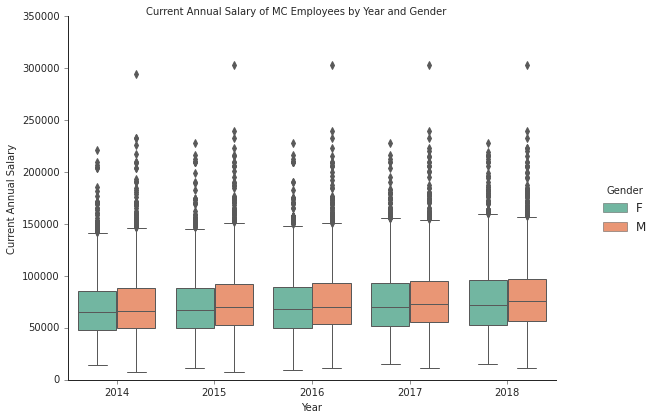

In [27]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Year", "Current Annual Salary", "Gender", data=mcsalaries, kind="box", palette="Set2")
    g.set_axis_labels("Year", "Current Annual Salary")
    g.fig.suptitle("Current Annual Salary of MC Employees by Year and Gender")
    g.fig.set_figheight(6)
    g.fig.set_figwidth(10)

#### Violinplot of Annual Salary by Year and Gender

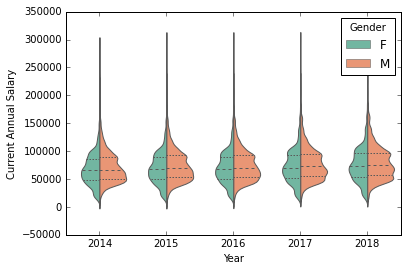

In [28]:
# violin plot with horizontal lines representing quartiles
violin_plot1 = sns.violinplot(x="Year", y="Current Annual Salary", hue="Gender",
                    data=mcsalaries, palette="Set2", split=True,
                    scale="count", inner="quartile")

#### 5-Number Summary for Male and Female MC Employees in 2014

In [29]:
# filter by gender
male14 = emp14_new.loc[emp14_new['Gender'] == 'M']

# calculate quartiles
quartilesm14 = percentile(male14["Current Annual Salary"], [25, 50, 75])

# calculate min/max
data_minm14, data_maxm14 = male14["Current Annual Salary"].min(), male14["Current Annual Salary"].max()

# print 5-number summary
print('5-Number Summary for Male MC Employees in 2014')
print('Min: %.3f' % data_minm14)
print('Q1: %.3f' % quartilesm14[0])
print('Median: %.3f' % quartilesm14[1])
print('Q3: %.3f' % quartilesm14[2])
print('Max: %.3f' % data_maxm14)

5-Number Summary for Male MC Employees in 2014
Min: 7200.000
Q1: 50106.540
Median: 66000.000
Q3: 88684.360
Max: 294263.000


In [30]:
# filter by gender
female14 = emp14_new.loc[emp14_new['Gender'] == 'F']

# calculate quartiles
quartilesf14 = percentile(female14["Current Annual Salary"], [25, 50, 75])

# calculate min/max
data_minf14, data_maxf14 = female14["Current Annual Salary"].min(), female14["Current Annual Salary"].max()

# print 5-number summary
print('5-Number Summary for Female MC Employees in 2014')
print('Min: %.3f' % data_minf14)
print('Q1: %.3f' % quartilesf14[0])
print('Median: %.3f' % quartilesf14[1])
print('Q3: %.3f' % quartilesf14[2])
print('Max: %.3f' % data_maxf14)

5-Number Summary for Female MC Employees in 2014
Min: 14221.000
Q1: 47784.130
Median: 65471.410
Q3: 85379.790
Max: 221731.000


#### 5-Number Summary for Male and Female MC Employees in 2018

In [31]:
# filter by gender
male18 = emp18_new.loc[emp18_new['Gender'] == 'M']

# calculate quartiles
quartilesm18 = percentile(male18["Current Annual Salary"], [25, 50, 75])

# calculate min/max
data_minm18, data_maxm18 = male18["Current Annual Salary"].min(), male18["Current Annual Salary"].max()

# print 5-number summary
print('5-Number Summary for Male MC Employees in 2018')
print('Min: %.3f' % data_minm18)
print('Q1: %.3f' % quartilesm18[0])
print('Median: %.3f' % quartilesm18[1])
print('Q3: %.3f' % quartilesm18[2])
print('Max: %.3f' % data_maxm18)

5-Number Summary for Male MC Employees in 2018
Min: 11147.240
Q1: 56742.000
Median: 75804.000
Q3: 96985.710
Max: 303091.000


In [32]:
# filter by gender
female18 = emp18_new.loc[emp18_new['Gender'] == 'F']

# calculate quartiles
quartilesf18 = percentile(female18["Current Annual Salary"], [25, 50, 75])

# calculate min/max
data_minf18, data_maxf18 = female18["Current Annual Salary"].min(), female14["Current Annual Salary"].max()

# print 5-number summary
print('5-Number Summary for Female MC Employees in 2018')
print('Min: %.3f' % data_minf18)
print('Q1: %.3f' % quartilesf18[0])
print('Median: %.3f' % quartilesf18[1])
print('Q3: %.3f' % quartilesf18[2])
print('Max: %.3f' % data_maxf18)

5-Number Summary for Female MC Employees in 2018
Min: 15647.000
Q1: 53100.660
Median: 72475.020
Q3: 95934.200
Max: 221731.000


#### A quick look by assignment category:

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


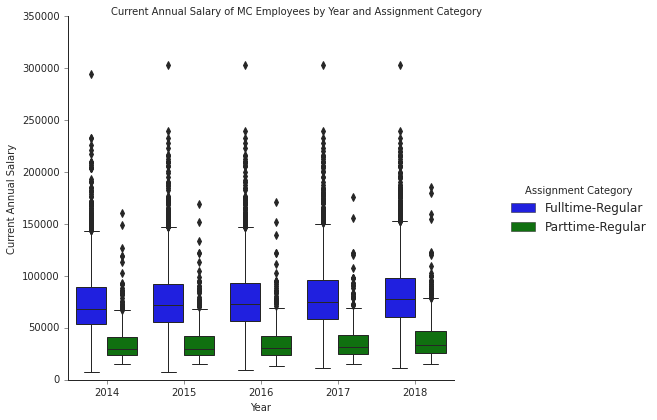

In [33]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Year", "Current Annual Salary", "Assignment Category", data=mcsalaries, kind="box")
    g.set_axis_labels("Year", "Current Annual Salary")
    g.fig.suptitle("Current Annual Salary of MC Employees by Year and Assignment Category")
    g.fig.set_figheight(6)
    g.fig.set_figwidth(10)

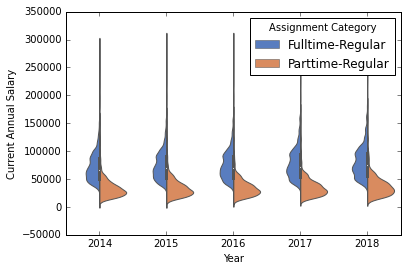

In [34]:
violin_plot = sns.violinplot(x="Year", y="Current Annual Salary", hue="Assignment Category",
                    data=mcsalaries, palette="muted", split=True)

### How did annual salary of MC police change by gender from 2014 to 2018?  <a class="anchor" id="section_2_4_2"></a>

I approached this question identically to how I examined MC employees, utilizing the "mcpolice" dataframe that I created by wrangling the original "mcsalaries" dataframe.

<b>Conclusion:</b> overall, the annual salary of MC employees in the police department specifically did not increase much over this five-year period. However, it is consistent in every year there was a greater disparity of males having a higher current annual salary.

#### Boxplot of Annual Salaries of Police by Year and Gender

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


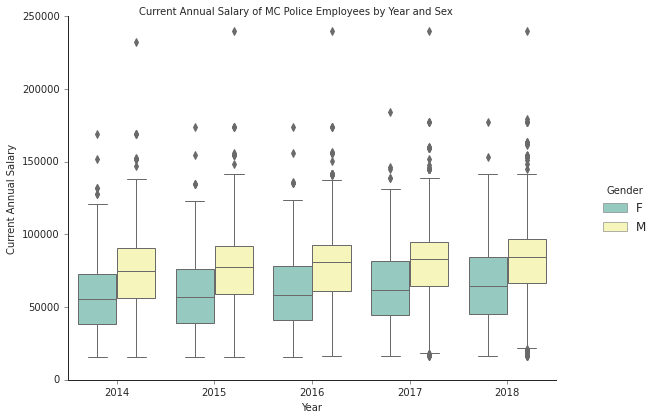

In [35]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Year", "Current Annual Salary", "Gender", data=mcpolice, kind="box", palette="Set3")
    g.set_axis_labels("Year", "Current Annual Salary")
    g.fig.suptitle("Current Annual Salary of MC Police Employees by Year and Sex")
    g.fig.set_figheight(6)
    g.fig.set_figwidth(10)

#### Violinplot of Annual Salaries of Police by Year and Gender

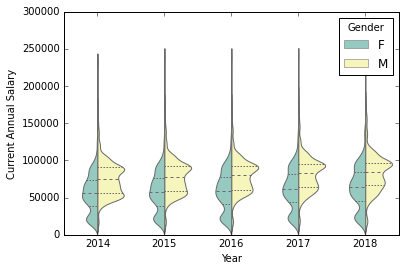

In [36]:
# violin plot with horizontal lines representing quartiles
violin_plot2 = sns.violinplot(x="Year", y="Current Annual Salary", hue="Gender",
                    data=mcpolice, palette="Set3", split=True,
                    scale="count", inner="quartile")

#### 5-Number Summary for Male and Female Police Employees in 2014

In [37]:
# filter by gender and year
mcpolice_male14 = mcpolice.loc[(mcpolice['Gender'] == 'M') & (mcpolice['Year'] == '2014')]

# calculate quartiles
quartilespm14 = percentile(mcpolice_male14["Current Annual Salary"], [25, 50, 75])

# calculate min/max
data_minpm14, data_maxpm14 = mcpolice_male14["Current Annual Salary"].min(), mcpolice_male14["Current Annual Salary"].max()

# print 5-number summary
print('5-Number Summary for Male Police Employees in 2014')
print('Min: %.3f' % data_minpm14)
print('Q1: %.3f' % quartilespm14[0])
print('Median: %.3f' % quartilespm14[1])
print('Q3: %.3f' % quartilespm14[2])
print('Max: %.3f' % data_maxpm14)

5-Number Summary for Male Police Employees in 2014
Min: 15656.000
Q1: 56059.160
Median: 74513.760
Q3: 90484.880
Max: 232588.000


In [38]:
# filter by gender and year
mcpolice_female14 = mcpolice.loc[(mcpolice['Gender'] == 'F') & (mcpolice['Year'] == '2014')]

# calculate quartiles
quartilespf14 = percentile(mcpolice_female14["Current Annual Salary"], [25, 50, 75])

# calculate min/max
data_minpf14, data_maxpf14 = mcpolice_female14["Current Annual Salary"].min(), mcpolice_female14["Current Annual Salary"].max()

# print 5-number summary
print('5-Number Summary for Male MC Employees in 2014')
print('Min: %.3f' % data_minpf14)
print('Q1: %.3f' % quartilespf14[0])
print('Median: %.3f' % quartilespf14[1])
print('Q3: %.3f' % quartilespf14[2])
print('Max: %.3f' % data_maxpf14)

5-Number Summary for Male MC Employees in 2014
Min: 15656.000
Q1: 38296.000
Median: 55837.710
Q3: 73102.393
Max: 169093.000


#### 5-Number Summary for Male and Female MC Employees in 2018

In [39]:
# filter by gender and year
mcpolice_male18 = mcpolice.loc[(mcpolice['Gender'] == 'M') & (mcpolice['Year'] == '2018')]

# calculate quartiles
quartilespm18 = percentile(mcpolice_male18["Current Annual Salary"], [25, 50, 75])

# calculate min/max
data_minpm18, data_maxpm18 = mcpolice_male18["Current Annual Salary"].min(), mcpolice_male18["Current Annual Salary"].max()

# print 5-number summary
print('5-Number Summary for Male Police Employees in 2014')
print('Min: %.3f' % data_minpm18)
print('Q1: %.3f' % quartilespm18[0])
print('Median: %.3f' % quartilespm18[1])
print('Q3: %.3f' % quartilespm18[2])
print('Max: %.3f' % data_maxpm18)

5-Number Summary for Male Police Employees in 2014
Min: 16451.500
Q1: 66800.000
Median: 84515.000
Q3: 96985.710
Max: 239566.000


In [40]:
# filter by gender and year
mcpolice_female18 = mcpolice.loc[(mcpolice['Gender'] == 'F') & (mcpolice['Year'] == '2018')]

# calculate quartiles
quartilespf18 = percentile(mcpolice_female18["Current Annual Salary"], [25, 50, 75])

# calculate min/max
data_minpf18, data_maxpf18 = mcpolice_female18["Current Annual Salary"].min(), mcpolice_female18["Current Annual Salary"].max()

# print 5-number summary
print('5-Number Summary for Male MC Employees in 2014')
print('Min: %.3f' % data_minpf18)
print('Q1: %.3f' % quartilespf18[0])
print('Median: %.3f' % quartilespf18[1])
print('Q3: %.3f' % quartilespf18[2])
print('Max: %.3f' % data_maxpf18)

5-Number Summary for Male MC Employees in 2014
Min: 16451.500
Q1: 45151.520
Median: 64261.710
Q3: 84515.000
Max: 177649.000


# Crime <a class="anchor" id="chapter3"></a>

## Reading the Data <a class="anchor" id="section_3_1"></a>

In [41]:
# reading the data into a dataframe using pandas
crime = pd.read_csv("DM_crime.csv")

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
# displaying the full dataset
crime.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201212149,2303,180053890,NaN,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,...,NaN,FREDERICK,NaN,RD,10/27/2018 09:15:00 PM,NaN,39.198413,-77.244946,5D,"(39.1984, -77.2449)"
1,201223224,2303,190002520,01/16/2019 03:51:46 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,...,NaN,VEIRS MILL,NaN,RD,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D,"(39.0374, -77.0517)"
2,201224613,2006,190004310,01/27/2019 06:05:56 PM,200,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,...,NaN,GIRARD,NaN,ST,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D,"(39.1465, -77.1849)"
3,201224656,3562,190003643,01/23/2019 09:45:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,WHEATON,...,NaN,BURNLEY,NaN,TER,01/23/2019 09:45:00 PM,NaN,39.036571,-77.047454,4D,"(39.0366, -77.0475)"
4,201267200,1103,190057412,11/28/2019 06:08:02 AM,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,...,NaN,GEORGIA,NaN,AVE,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D,"(39.0343, -77.0492)"


### Parsing Date Time

In [43]:
# creating a new column in the datetime format
crime['date_new'] = pd.to_datetime(crime['Start_Date_Time'], format='%m/%d/%Y %I:%M:%S %p')

In [44]:
crime['year'] = crime['date_new'].dt.year

In [45]:
crime['time'] = crime['date_new'].dt.time

In [46]:
crime['weekday'] = crime['date_new'].dt.weekday
#Monday is 0 and Sunday is 6

### Observing the Structure

In [47]:
# observing the datatypes of the dataset
crime.dtypes

Incident ID                        int64
Offence Code                      object
CR Number                          int64
Dispatch Date / Time              object
NIBRS Code                        object
Victims                            int64
Crime Name1                       object
Crime Name2                       object
Crime Name3                       object
Police District Name              object
Block Address                     object
City                              object
State                             object
Zip Code                         float64
Agency                            object
Place                             object
Sector                            object
Beat                              object
PRA                               object
Address Number                   float64
Street Prefix                     object
Street Name                       object
Street Suffix                     object
Street Type                       object
Start_Date_Time 

### Summarizing the Dataframe

In [48]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197153 entries, 0 to 197152
Data columns (total 34 columns):
Incident ID               197153 non-null int64
Offence Code              197153 non-null object
CR Number                 197153 non-null int64
Dispatch Date / Time      166676 non-null object
NIBRS Code                197153 non-null object
Victims                   197153 non-null int64
Crime Name1               197091 non-null object
Crime Name2               197091 non-null object
Crime Name3               197091 non-null object
Police District Name      197153 non-null object
Block Address             178644 non-null object
City                      196279 non-null object
State                     197153 non-null object
Zip Code                  193968 non-null float64
Agency                    197153 non-null object
Place                     197153 non-null object
Sector                    197108 non-null object
Beat                      197108 non-null object
PRA      

In [49]:
crime.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location,date_new,year,time,weekday
0,201212149,2303,180053890,NaN,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,...,10/27/2018 09:15:00 PM,NaN,39.198413,-77.244946,5D,"(39.1984, -77.2449)",2018-10-27 21:15:00,2018,21:15:00,5
1,201223224,2303,190002520,01/16/2019 03:51:46 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,...,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D,"(39.0374, -77.0517)",2019-01-16 15:51:00,2019,15:51:00,2
2,201224613,2006,190004310,01/27/2019 06:05:56 PM,200,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,...,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D,"(39.1465, -77.1849)",2019-01-27 18:05:00,2019,18:05:00,6
3,201224656,3562,190003643,01/23/2019 09:45:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,WHEATON,...,01/23/2019 09:45:00 PM,NaN,39.036571,-77.047454,4D,"(39.0366, -77.0475)",2019-01-23 21:45:00,2019,21:45:00,2
4,201267200,1103,190057412,11/28/2019 06:08:02 AM,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,...,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D,"(39.0343, -77.0492)",2019-11-28 06:08:00,2019,06:08:00,3


## Creating "crime_look" <a class="anchor" id="section_3_2"></a>

In [50]:
# selecting the columns
columns = crime[['Incident ID', 'Victims', 'Crime Name2', 'Police District Name', 'Police District Number', 'year', 'time', 'weekday']]

In [51]:
#creating the new dataframe
crime_look = columns.copy()

In [52]:
# renaming the columns so they match the other dataframe
crime_look = crime_look.rename(columns={'Incident ID': 'id', 'Victims': 'victims', 'Crime Name2': 'crime', 'Police District Name': 'district_name', 'Police District Number':'district_number'})

In [53]:
# Get names of indexes for which column year is 2016 or 2020
delete_years = crime_look[(crime_look['year'] == 2016) | (crime_look['year'] == 2020)].index
 
# Delete these row indexes from dataFrame
crime_look.drop(delete_years , inplace=True)

In [54]:
crime_look.head()

,id,victims,crime,district_name,district_number,year,time,weekday
0,201212149,1,Shoplifting,GERMANTOWN,5D,2018,21:15:00,5
1,201223224,1,Shoplifting,WHEATON,4D,2019,15:51:00,2
2,201224613,1,Arson,MONTGOMERY VILLAGE,6D,2019,18:05:00,6
3,201224656,1,Drug/Narcotic Violations,WHEATON,4D,2019,21:45:00,2
4,201267200,1,Forcible Rape,WHEATON,4D,2019,06:08:00,3


## Answering Phase I Questions <a class="anchor" id="section_3_3"></a>

### Did the distribution of crime in different districts change from 2017 to 2019? <a class="anchor" id="section_3_3_1"></a>

I created the "crime_look" dataframe from the original "crime" dataset, because I found that the years 2016 and 2020 did not have a full picture of those respective years. I converted datetime to add the year and weekday columns for later analysis.

Because this data is categorical in nature, it makes sense to ask about the distribution of crime incidents. I used the seaborn package and represented this data by both district number and district name.

<b>Conclusion:</b> district 3D or Silver Spring had the highest number of crime incidents all three years, while 8D or the city of Takoma Park had the lowest number of crime incidents.

Text(0.5, 0.98, 'Histogram of Crime Incidents by Year and District Number')

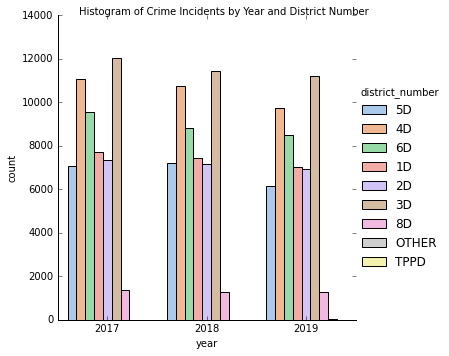

In [55]:
cplt = sns.catplot(x="year", kind="count", hue="district_number", palette="pastel", data=crime_look)
cplt.fig.suptitle('Histogram of Crime Incidents by Year and District Number')

Text(0.5, 0.98, 'Histogram of Crime Incidents by Year and District')

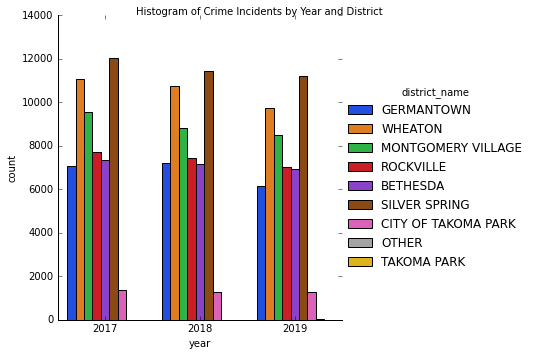

In [56]:
cplt = sns.catplot(x="year", kind="count", hue="district_name", palette="bright", data=crime_look)
cplt.fig.suptitle('Histogram of Crime Incidents by Year and District')

### What days of the week had the highest amount of crime? <a class="anchor" id="section_3_3_2"></a>

By parsing datetime, I could extract the day of the week from the date the crime incident occurred. I visually represented this with another histogram to examine the distribution.

<b>Conclusion</b>: every year, Friday had the highest incidents of crime, while Sunday consistently had the lowest incidents.

Text(0.5, 0.98, 'Histogram of Crime Incidents by Year and Weekday')

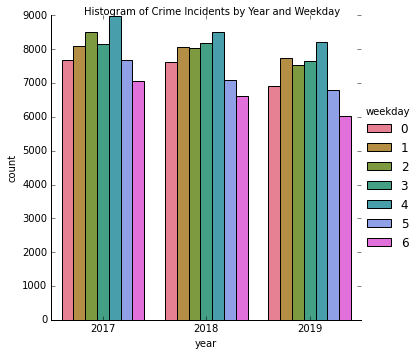

In [57]:
cplt2 = sns.catplot(x="year", kind="count", hue="weekday", palette="husl", data=crime_look)
cplt2.fig.suptitle('Histogram of Crime Incidents by Year and Weekday')

* Monday = 0; Sunday = 6

# MCPD Bias Incidents <a class="anchor" id="chapter4"></a>

## Reading the Data <a class="anchor" id="section_4_1"></a>

In [58]:
# reading the data into a dataframe using pandas
dmbias = pd.read_csv("DM_bias.csv")

In [59]:
# removing spaces and adding underscores
dmbias.columns = dmbias.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### Parsing Date Time

In [60]:
# creating a new column in the datetime format
dmbias['date_new'] = pd.to_datetime(dmbias['incident_date'], format='%m/%d/%Y')

In [61]:
dmbias['year'] = dmbias['date_new'].dt.year

In [62]:
dmbias['bias_type'] = dmbias['bias_code'].str.split('Anti-').str[-1].str.strip()

In [63]:
dmbias['bias_type'] = dmbias['bias_type'].str.split('Anti').str[-1].str.strip()

In [64]:
dmbias.head()

,incident_date,id,district,bias_code,bias_code2,bias,status,#_of_victims,victim_type,#_of_suspects,#_suspects_less_than_18_years_old,#_suspects_18-35_years_old,#_suspects_36-45_years_old,#_suspects_46-55_years_old,#_suspects_>55_years_old,unknown,date_new,year,bias_type
0,08/11/2017,170524265,1D,21 - Anti-Jewish,NaN,Vandalism,OPEN,NaN,Government,NaN,NaN,NaN,NaN,NaN,NaN,X,2017-08-11,2017,Jewish
1,03/14/2016,16012552,1D,12 - Anti-Black,NaN,Written Intimidation,NaN,1.0,Individual(s),1.0,1.0,NaN,NaN,NaN,NaN,NaN,2016-03-14,2016,Black
2,11/12/2016,16058486,3D,32 - Anti-Hispanic,NaN,Vandalism,OPEN,NaN,Religious Organization,NaN,NaN,NaN,NaN,NaN,NaN,X,2016-11-12,2016,Hispanic
3,06/26/2016,16032895,3D,12 - Anti-Black,NaN,Vandalism,OPEN,1.0,Individual(s),NaN,NaN,NaN,NaN,NaN,NaN,X,2016-06-26,2016,Black
4,02/08/2019,190006274,1D,12 - Anti-Black,NaN,Written Intimidation,NaN,NaN,Individual(s),4.0,4.0,NaN,NaN,NaN,NaN,NaN,2019-02-08,2019,Black


### Observing the Structure

In [65]:
# observing the datatypes of the dataset
dmbias.dtypes

incident_date                                object
id                                            int64
district                                     object
bias_code                                    object
bias_code2                                   object
bias                                         object
status                                       object
#_of_victims                                float64
victim_type                                  object
#_of_suspects                               float64
#_suspects_less_than_18_years_old           float64
#_suspects_18-35_years_old                  float64
#_suspects_36-45_years_old                  float64
#_suspects_46-55_years_old                  float64
#_suspects_>55_years_old                    float64
unknown                                      object
date_new                             datetime64[ns]
year                                          int64
bias_type                                    object
dtype: objec

### Summarizing the Dataframe

In [66]:
print(dmbias.info())
dmbias.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 19 columns):
incident_date                        448 non-null object
id                                   448 non-null int64
district                             448 non-null object
bias_code                            448 non-null object
bias_code2                           37 non-null object
bias                                 448 non-null object
status                               329 non-null object
#_of_victims                         235 non-null float64
victim_type                          448 non-null object
#_of_suspects                        169 non-null float64
#_suspects_less_than_18_years_old    52 non-null float64
#_suspects_18-35_years_old           38 non-null float64
#_suspects_36-45_years_old           19 non-null float64
#_suspects_46-55_years_old           17 non-null float64
#_suspects_>55_years_old             21 non-null float64
unknown                              296

incident_date                                object
id                                            int64
district                                     object
bias_code                                    object
bias_code2                                   object
bias                                         object
status                                       object
#_of_victims                                float64
victim_type                                  object
#_of_suspects                               float64
#_suspects_less_than_18_years_old           float64
#_suspects_18-35_years_old                  float64
#_suspects_36-45_years_old                  float64
#_suspects_46-55_years_old                  float64
#_suspects_>55_years_old                    float64
unknown                                      object
date_new                             datetime64[ns]
year                                          int64
bias_type                                    object
dtype: objec

## Answering Phase I Questions <a class="anchor" id="section_4_2"></a>

### What police districts had the highest incidents of biased crime? <a class="anchor" id="section_4_2_1"></a>

This dataset is like the crime dataset in that it is full of mostly categorical variables, however, it has even less data to work with. Thus, I approached this question with a histogram.

<b>Conclusion: </b> district 2D, or Bethesda had the highest incidents of biased crime, while TPPD or Takoma Park had the lowest. This is very different from the distribution of biased incidents we saw in the overall crime dataset. While Takoma Park had the lowest incidents of crimes in both, Silver Spring had the highest incidents in the overall crime dataset. In the biased crime dataset, Silver Spring seems to be more average.

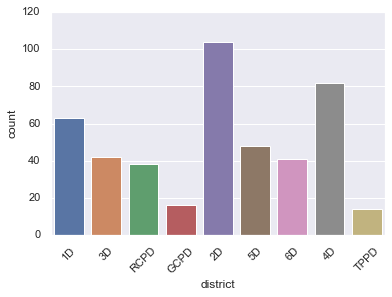

In [67]:
sns.set(style="darkgrid")
ax2 = sns.countplot(x=dmbias['district'], data=dmbias)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
plt.show()

### Which biased type crime occurred most often? <a class="anchor" id="section_4_2_2"></a>
The dataset has the variable "bias_code" which represents the type of bias of the crime. To approach this quqestion, I plotted this variable on a histogram. I utilized the "bias_type" variable I created by parsing the data, so that the messy code number and the word "Anti" would not be present. Not only did this look cleaner, but it made the graph more legible.

<b>Conclusion:</b> Anti-Jewish bias incidents occurred most frequently, with Anti-Black trailing right behind it. Additionally, Arab had the lowest accounted for type of biased crime in Montgomery county.

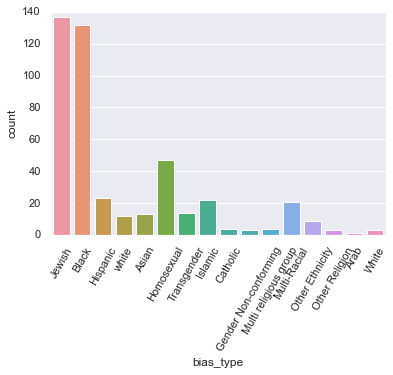

In [68]:
sns.set(style="darkgrid")
ax2 = sns.countplot(x=dmbias['bias_type'], data=dmbias)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
plt.show()

<b>A quick look by number of victims:</b>

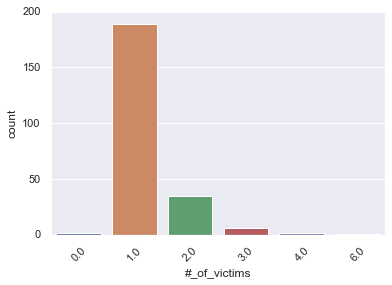

In [69]:
sns.set(style="darkgrid")
ax2 = sns.countplot(x=dmbias['#_of_victims'], data=dmbias)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
plt.show()

# Answering Phase II Questions <a class="anchor" id="chapter5"></a>

## How can we compare the crime and bias datasets? <a class="anchor" id="section_5_1"></a>

In order to compare the crime and bias datasets, I needed to merge them into one dataframe. I did this by cleaning them such that the columns selected were the same with the same name, and I added the "dataset" column to describe which dataframe the row was from.

<b>Conclusion:</b> I found that the count of the bias incident dataset was too low to plot alongside the crime dataset. Using Seaborn, I plotted the data in a side-by-side proportional plot across each year. Overall, I do not think many significant conclusions can be drawn by attempting to graph these two datasets alongside one another.

### Merge the Dataframes

### 1. Creating the crime_new dataframe

In [70]:
# selecting the columns
crime_columns = crime[['Incident ID', 'Police District Number', 'year']]

In [71]:
#creating the new dataframe
crime_new = crime_columns.copy()

In [72]:
# renaming the columns so they match the other dataframe
crime_new = crime_new.rename(columns={'Incident ID': 'id','Police District Number':'district'})

In [73]:
# inserting the dataset column
crime_new.insert(1, 'dataset', 'crime')

In [74]:
crime_new.head()

,id,dataset,district,year
0,201212149,crime,5D,2018
1,201223224,crime,4D,2019
2,201224613,crime,6D,2019
3,201224656,crime,4D,2019
4,201267200,crime,4D,2019


### 2. Creating the bias_new dataframe

In [75]:
# selecting the columns
bias_columns = dmbias[['id', 'district', 'year']]

In [76]:
#creating the new dataframe
bias_new = bias_columns.copy()

In [77]:
# inserting the dataset column
bias_new.insert(1, 'dataset', 'bias')

In [78]:
bias_new.head()

,id,dataset,district,year
0,170524265,bias,1D,2017
1,16012552,bias,1D,2016
2,16058486,bias,3D,2016
3,16032895,bias,3D,2016
4,190006274,bias,1D,2019


### 3. Merging the dataframes

In [79]:
full_crime = pd.concat([crime_new, bias_new])

In [80]:
full_crime.head()

,id,dataset,district,year
0,201212149,crime,5D,2018
1,201223224,crime,4D,2019
2,201224613,crime,6D,2019
3,201224656,crime,4D,2019
4,201267200,crime,4D,2019


In [81]:
full_crime.tail()

,id,dataset,district,year
443,190058610,bias,5D,2019
444,16007812,bias,4D,2016
445,190053319,bias,RCPD,2019
446,16059010,bias,1D,2016
447,190016883,bias,4D,2019


In [82]:
full_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197601 entries, 0 to 447
Data columns (total 4 columns):
id          197601 non-null int64
dataset     197601 non-null object
district    197601 non-null object
year        197601 non-null int64
dtypes: int64(2), object(2)
memory usage: 7.5+ MB


### 4. Dropping duplicates

In [83]:
# counting data with the same id
len(full_crime['id'])-len(full_crime['id'].drop_duplicates())

16415

In [84]:
197601-16415

181186

In [85]:
full_crime2=full_crime.drop_duplicates(subset=['id','dataset'])

In [86]:
full_crime2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181186 entries, 0 to 447
Data columns (total 4 columns):
id          181186 non-null int64
dataset     181186 non-null object
district    181186 non-null object
year        181186 non-null int64
dtypes: int64(2), object(2)
memory usage: 6.9+ MB


In [87]:
full_crime2.head()

,id,dataset,district,year
0,201212149,crime,5D,2018
1,201223224,crime,4D,2019
2,201224613,crime,6D,2019
3,201224656,crime,4D,2019
4,201267200,crime,4D,2019


In [88]:
full_crime2.tail()

,id,dataset,district,year
443,190058610,bias,5D,2019
444,16007812,bias,4D,2016
445,190053319,bias,RCPD,2019
446,16059010,bias,1D,2016
447,190016883,bias,4D,2019


### 5. Dropping 2016 and 2020

In [89]:
# Get names of indexes for which column year is 2016 or 2020
delete_years2 = full_crime2[(full_crime2['year'] == 2016) | (full_crime2['year'] == 2020)].index
 
# Delete these row indexes from dataFrame
full_crime2.drop(delete_years2, inplace=True)

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Trying to plot them together:
* We do not have enough values in the bias dataset to make any visual comparison.

Text(0.5, 0.98, 'Histogram of Crime Incidents by Dataset Type and District')

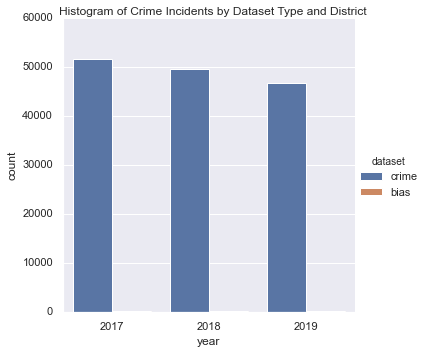

In [90]:
cplt = sns.catplot(x="year", kind="count", hue="dataset", data=full_crime2)
cplt.fig.suptitle('Histogram of Crime Incidents by Dataset Type and District')

## Plotting proportion as a solution <a class="anchor" id="section_5_1_1"></a>

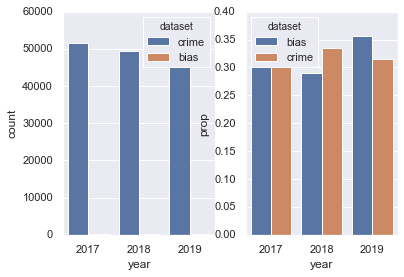

In [91]:
df = full_crime2
x, y, hue = "year", "prop", "dataset"
hue_order = ["crime", "bias"]

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0])

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

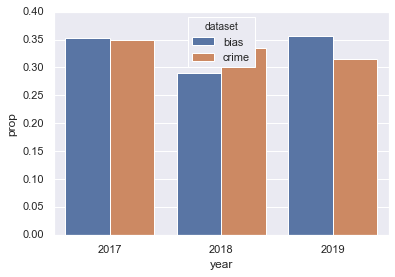

In [92]:
df = full_crime2
x, y, hue = "year", "prop", "dataset"
hue_order = ["crime", "bias"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

# Can we accurately predict police employees that are male with a ML model? <a class="anchor" id="section_5_2"></a>
Logistic regression models are utilized to predict binary classes. In this case, we are computing the probability that Montgomery County police employees are male. In order to create this model, I needed to create the "police_new" dataframe. To run the logistic regression, I needed to recode categorical variables such as Assignment Category and Gender as binary numbers. I also created the new variable,  "Years Total", to represent the number of years the employee worked at the Montgomery County police department.

I utilized the Gender, Assignment Category, Current Annual Salary, Over Time Pay, and Years Total as parameters. I split the data into train and test data, trained the model, and checked the accuracy of the model for predictions.

<b>Conclusion:</b> The accuracy of the model was 72%, which is relatively high. Precision was 72%, which indicates a low false positive rate; in other words, of all employees classified as male, 72% are male. The recall value indicates that the model can identify employees that are male in the test set 94% of time. However, observing the Receiver Operating Characteristic (ROC) Curve, it showed an AUC score of 0.596 indicating the model is a relatively worthless classifier.

## Building a Logistic Regression Model <a class="anchor" id="section_5_2_1"></a>

### 1. Clean the data

#### Creating the "police_new" dataframe

In [93]:
# selecting the columns
police_columns = mcpolice[['Gender', 'Assignment Category', 'Current Annual Salary', 'Overtime Pay', 'Date First Hired', 'Year']]

In [94]:
# creating the new dataframe
police_new = police_columns.copy()

In [95]:
# creating a new column in the datetime format
police_new['Year Hired'] = pd.to_datetime(police_new['Date First Hired'], format='%m/%d/%Y')

In [96]:
# creating the year hired column
police_new['Year Hired'] = police_new['Year Hired'].dt.year

In [97]:
police_new['Years Total'] = police_new['Year'].astype(int) - police_new['Year Hired'].astype(int)

#### Encoding Assignment Category and Gender

In [98]:
police_final = police_new.copy()
police_final['Gender'] = np.where(police_final['Gender'].str.contains('M'), 1, 0)

In [99]:
replace_map = {'Assignment Category': {'Parttime-Regular': 0, 'Fulltime-Regular': 1}}
police_final.replace(replace_map, inplace=True)

#### Observing the final "police_final" dataframe

In [100]:
police_final.drop(['Date First Hired', 'Year', 'Year Hired'], axis=1, inplace=True)
police_final.head()

,Gender,Assignment Category,Current Annual Salary,Overtime Pay,Years Total
0,0,1,67527.83,1202.75,28
1,1,1,95007.83,6519.66,26
5,1,1,63056.51,18045.28,7
8,0,1,43410.92,20.97,7
18,0,0,19821.46,42.89,10


In [101]:
count_male = len(police_final[police_final['Gender']==1])
count_female = len(police_final[police_final['Gender']==0])
pct_of_male = count_male/(count_male+count_female)
print("percentage of male is", pct_of_male*100)
pct_of_female = count_female/(count_male+count_female)
print("percentage of female", pct_of_female*100)

percentage of male is 62.88191140712549
percentage of female 37.11808859287451


* Classes are imbalanced
* Ratio of male to female instances is 62:37

In [102]:
police_final.groupby('Gender').mean()

,Assignment Category,Current Annual Salary,Overtime Pay,Years Total
Gender,,,,
0,0.781544,60146.000578,4887.532866,11.881515
1,0.980834,79586.957213,8852.955241,12.682078


#### Ensuring All Nulls are Gone

In [103]:
print(police_final.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9459 entries, 0 to 10067
Data columns (total 5 columns):
Gender                   9459 non-null int32
Assignment Category      9459 non-null int64
Current Annual Salary    9459 non-null float64
Overtime Pay             8987 non-null float64
Years Total              9459 non-null int32
dtypes: float64(2), int32(2), int64(1)
memory usage: 369.5 KB
None


In [104]:
police_final = police_final.dropna(axis=0, how='any')
pd.isnull(police_final).sum() > 0

Gender                   False
Assignment Category      False
Current Annual Salary    False
Overtime Pay             False
Years Total              False
dtype: bool

### 2. Split data into train and test data

I am using train_test_split from model_selection module to split our data. Thus, 70% of the data will be training data and 30% will be testing data.

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(police_final.drop('Gender',axis=1), 
                                                    police_final['Gender'], test_size=0.30,
                                                    random_state=101)

### 3. Using Logistic Regression to train the model

In [106]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

### 4. Check the accuracy of the model for predictions

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.22      0.35       957
           1       0.69      0.97      0.81      1740

    accuracy                           0.70      2697
   macro avg       0.75      0.60      0.58      2697
weighted avg       0.73      0.70      0.65      2697



The weight avg is 73 percent accuracy, which looks pretty good.

In [108]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,predictions)))

F1 Score: 0.8092956396741734


### 5. Check the confusion matrix <a class="anchor" id="section_5_2_5"></a>

In [109]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 212,  745],
       [  51, 1689]], dtype=int64)

* True positive: 312 (We predicted a positive result and it was positive)
* True negative: 1639 (We predicted a negative result and it was negative)
* False positive: 645 (We predicted a positive result and it was negative)
* False negative: 101 (We predicted a negative result and it was positive)

## Interpretation of Performance Measures <a class="anchor" id="section_5_2_2"></a>

### Visaulizing the Confusion Matrix as a Heatmap

Text(0.5, 264.2, 'Predicted label')

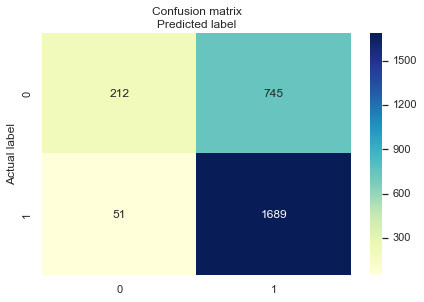

In [110]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [111]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1 Score: {}".format(f1_score(y_test,predictions)))

Accuracy: 0.7048572487949574
Precision: 0.6939194741166803
Recall: 0.9706896551724138
F1 Score: 0.8092956396741734


### Interpreting the Heatmap Prediction Scores

As explained by Rnuka Joshi in [this blog post](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/):

**Confusion matrix**: Provides an evalution of a classification model.
* True Positives (TP) - if actual class value indicates the employee is male and predicted class tells you the employee is male.
* True Negatives (TN) - if actual class value indicates the employee is not male and predicted class tells you the employee is not male.
* False Positives (FP) – if actual class value indicates the employee is not male but predicted class tells you the employee is male.
* False Negatives (FN) – if actual class value indicates the employee is male and predicted class tells you that employee is not male.

**Accuracy:** Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
* Accuracy = TP+TN/TP+FP+FN+TN

**Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all employees labeled as males, how many were actually male? High precision relates to the low false positive rate.
* Precision = TP/TP+FP

**Recall (Sensitivity):** Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the employees that are male, how many did we label?
* Recall = TP/TP+FN

**F1 Score:** F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
* F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Conclusions:**
* Accuracy was 72% which is relatively high.
* Precision was 72%, which is relatively high and relates to the low false positive rate. It says that of all employees classified as male, 72% are actually male.
* Recall indicates that if there are employees that are male in the test set, the Logistic Regression model can identify it 94% of the time, which is good for this model as it is above 50%.
* F1 Score is 0.81 for female and 0.46 for male.

### Receiver Operating Characteristic (ROC) Curve

This curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

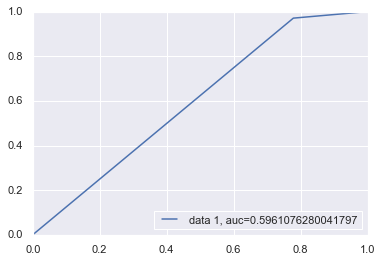

In [112]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.596. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier. Thus, our model is not a very good classifier.

# Final Thoughts <a class="anchor" id="chapter6"></a>

## Recommendations for further operationalization <a class="anchor" id="section_6_1"></a>

<b>Montgomery County Salaries (2014-2018)</b>

These datasets could be improved by adding more data such as education level, years worked in Montgomery County, and whether or not the person worked in a different position. I also think a dataset that includes data of only the Montgomery County employees that worked all 5, 10, or some other interval period could be useful for making more powerful visualizations of change over over time. It would be interesting to compare this information to salary information on individuals in the private sector in Montgomery county.

<b>Crime</b>

A very interesting practical application would be to present this data in a live dashboard, plotting incidents by their coordinates. This dataset is updated freqeuntly, and I think it would be interesting to be able to easily visually scrub through incidents over time in various locations.

<b>MCPD Bias Incidents</b>

A reccommendation for this dataset is for the actual age of suspects to be included in this dataset. It would also be helpful to already have a column with the "bias type" that is clean and easier to use. A column that has the district name would be more informative as well, though it is not necessary. This dataset could be used to in conjunction with other data about biased incidents in other counties, since there are not many incidents recorded in Montgomery County so far. I also think more documentation about how these incidents were coded would be useful.

## Acknowledgements <a class="anchor" id="section_6_2"></a>

* Hamman, John F
* Saidi, Rachel
* Mohamed, Abdirisak